<a href="https://colab.research.google.com/github/lilyreber/Numerical-inversion-of-characteristic-functions/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *

class ChrFunc:
    def __init__(self, phi):
        self.phi = phi

    def __get_error__(self, true_chr):
        pass

    def cdf(self, x):
        pass

    def make_plot(self, start, stop, num):
        x = np.linspace(start, stop, num)
        F_x = np.array([self.cdf(y) for y in x])

        plt.plot(x, F_x, label='Функция распределения')
        plt.title('График функции распределения')
        plt.xlabel('x')
        plt.ylabel('F(x)')
        plt.grid()
        plt.legend()
        plt.show()


import scipy.stats as stats

# Straight on
class A(ChrFunc):
    def __init__(self, N, delta, phi):
        super().__init__(phi)
        self.N = int(N)
        self.delta = delta

    def cdf(self, x):
        F = 0.5 + (self.delta * x) / (2 * pi)
        for v in range(1 - self.N, self.N):
            if v == 0:
                continue
            F -= (self.phi(self.delta * v) / (2 * pi * 1j * v)) * exp(-1j * self.delta * v * x)
        return F


# Battling the truncation error by deforming F
class B(ChrFunc):
    def __init__(self, N, delta, phi):
        super().__init__(phi)
        self.N = int(N)
        self.delta = delta

    def __C(self, t):
        if t > 1:
            return 0
        if t < 0:
            return self.__C(-t)
        return (1 - t) * cos(pi * t) + sin(pi * t) / pi

    def cdf(self, x):
        F = 0.5 + (self.delta * x) / (2 * pi)
        for v in range(1 - self.N, self.N):
            if v == 0:
                continue
            F -= self.__C(v / self.N) * (self.phi(self.delta * v) / (2 * pi * 1j * v)) * exp(-1j * self.delta * v * x)
        return F


# Reducing importance of trigonometric series by considering difference between F and <I>
class C(ChrFunc):
    def __init__(self, N, delta, phi):
        super().__init__(phi)
        self.N = int(N)
        self.delta = delta

    def cdf(self, x):
        F = stats.norm.cdf(x, loc=0, scale=1)
        for v in range(1 - self.N, self.N):
            if v == 0:
                continue
            p = self.delta * v
            F += ((exp(- (p ** 2) / 2) - self.phi(p)) / (2 * pi * 1j * v)) * exp(-1j * p * x)
        return F


# Reducing the aliasing error and reducing importance of trigonometric series
class D(ChrFunc):
    def __init__(self, N, delta, phi, K):
        super().__init__(phi)
        self.N = int(N)
        self.delta = delta
        self.K = K

    def __H(self, x, delta):
        H = 0
        for v in range(1 - self.N, self.N):
            if v == 0:
                continue
            p = delta * v
            H += ((exp(- (p ** 2) / 2) - self.phi(p)) / (2 * pi * 1j * v)) * exp(-1j * p * x)
        return H

    def cdf(self, x):
        F = stats.norm.cdf(x, loc=0, scale=1) + self.__H(x, self.delta)
        d = (2 * pi) / (self.N * self.delta)
        for v in range(1, self.K):
            L = self.N // self.K
            delta_1 = self.delta / self.K
            d_1 = self.K * d
            F -= self.__H(x + v * L * d_1, delta_1)
        return F


# Reducing the aliasing error and Reducing importance of trigonometric
# series and Battling the truncation error by deforming F
class E(ChrFunc):
    def __init__(self, N, delta, phi, K):
        super().__init__(phi)
        self.N = int(N)
        self.delta = delta
        self.K = K

    def __C(self, t):
        if t > 1:
            return 0
        if t < 0:
            return self.__C(-t)
        return (1 - t) * cos(pi * t) + sin(pi * t) / pi

    def __G(self, x, delta):
        G = 0
        for v in range(1 - self.N, self.N):
            if v == 0:
                continue
            p = delta * v
            G += self.__C(v / self.N) * ((exp(- (p ** 2) / 2) - self.phi(p)) / (2 * pi * 1j * v)) * exp(-1j * p * x)
        return G

    def cdf(self, x):
        F = stats.norm.cdf(x, loc=0, scale=1) + self.__G(x, self.delta)
        d = (2 * pi) / (self.N * self.delta)
        for v in range(1, self.K):
            L = self.N // self.K
            delta_1 = self.delta / self.K
            d_1 = self.K * d
            F -= self.__G(x + v * L * d_1, delta_1)
        return F


In [ ]:
class Norm():
  def __init__(self, m, var):
      self.m = m
      self.var = var

  def chr(self, x):
      return exp(self.m * 1j * x - (self.var * (x ** 2)) / 2)

  def cdf(self, x)
      return stats.norm.cdf(x, loc=self.m, scale=self.var)


SyntaxError: expected ':' (<ipython-input-13-a8dc610230ee>, line 9)

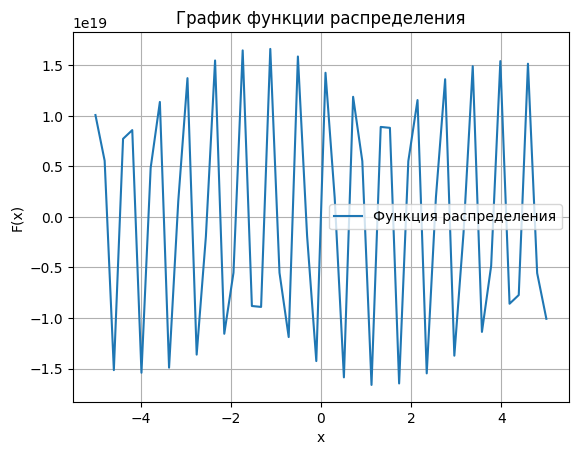

In [ ]:
a = A(1e6, 0.00001, lambda x:  exp((x **2) / 2))
a.cdf(0)
a.make_plot(-5, 5, 50)

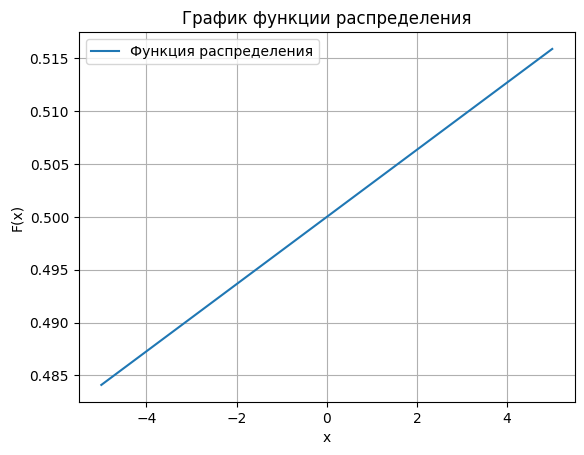

In [ ]:
a = A(1e3, 0.00001, lambda x:  exp((x ** 2) / 2))
a.cdf(0)
a.make_plot(-5, 5, 50)

In [1]:
a = A(1e5, 0.00001, lambda x: exp(x + (x**2) / 2))
a.cdf(0)
a.make_plot(-5, 5, 50)

NameError: name 'A' is not defined

# Проверим на равномерном распределении:

In [ ]:
class Unif():
  def __init__(self, a, b):
      self.a = a
      self.b = b

  def chr(self, x):
      return (x - self.a) / (self.b - self.a)

  def cdf(self, x):
      return (exp(1j * x * self.b) - exp(1j * x * self.a)) / (1j * x * (self.b - self.a))

In [ ]:
unif = Unif(0, 1)

In [ ]:
chr = unif.chr

N = 1e6
delta = 1e-5

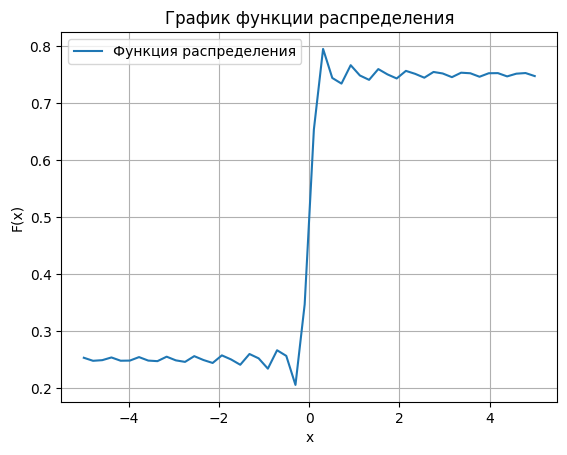

In [ ]:
chr_a = A(N, delta, chr)
chr_a.make_plot(-5, 5, 50)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


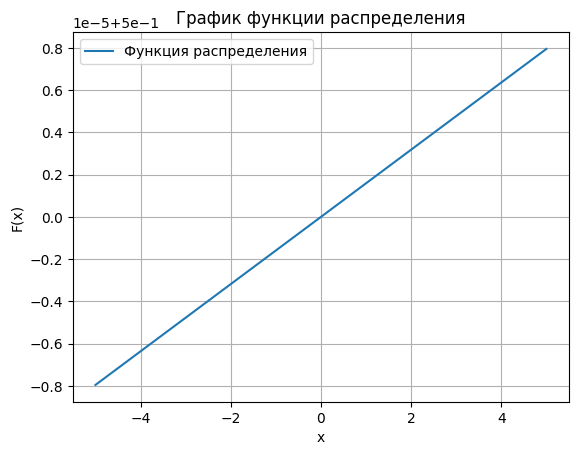

In [ ]:
chr_b = B(N, delta, chr)
chr_b.make_plot(-5, 5, 50)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


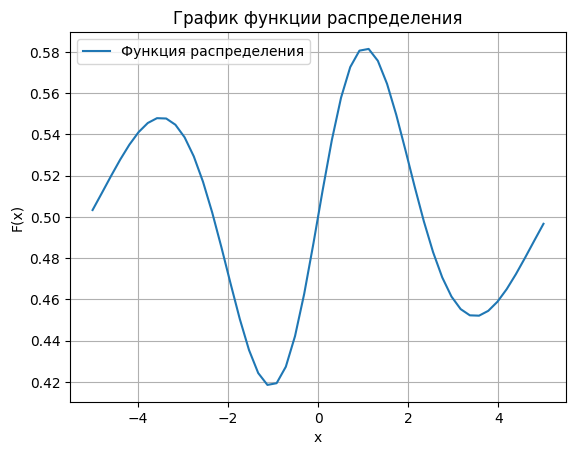

In [ ]:
chr_c = C(N, delta, chr)
chr_c.make_plot(-5, 5, 50)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


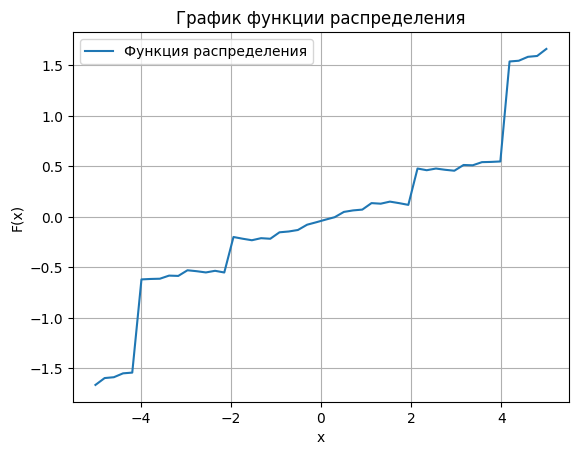

In [ ]:
chr_d = D(N, delta, chr, 10)
chr_d.make_plot(-5, 5, 50)

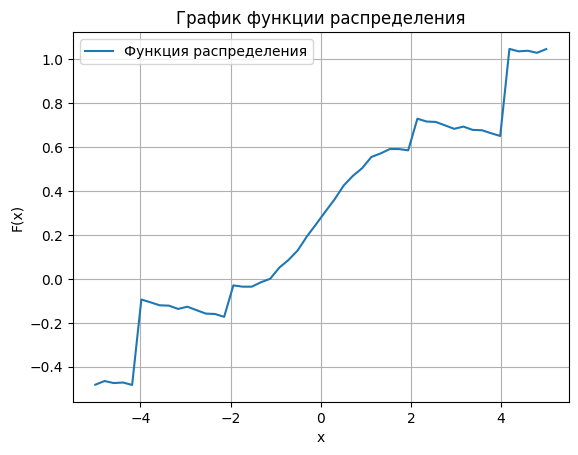

In [ ]:
chr_e = E(N, delta, chr, 10)
chr_e.make_plot(-5, 5, 50)

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 18.6 µs


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


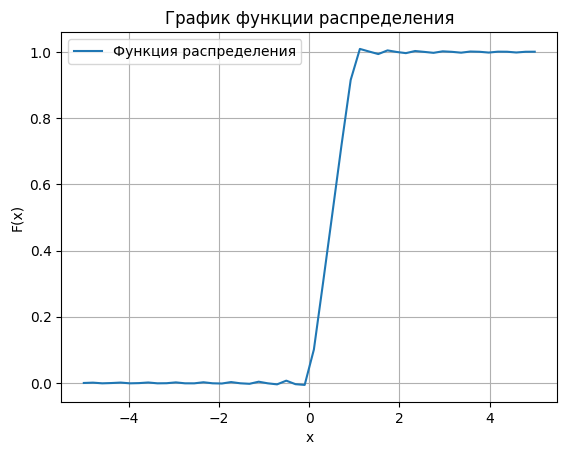

CPU times: user 2min, sys: 371 ms, total: 2min 1s
Wall time: 2min 2s


In [ ]:
%time unif = A(1e6, 0.00001, lambda x: (exp(1j * x) - 1)/(1j * x)) #U[0, 1]
%time unif.make_plot(-5, 5, 50)

In [ ]:
unif = A(1e6, 0.000001, lambda x: (exp(1j * x) - 1)/(1j * x)) #U[0, 1]
unif.make_plot(-5, 5, 50)

KeyboardInterrupt: 

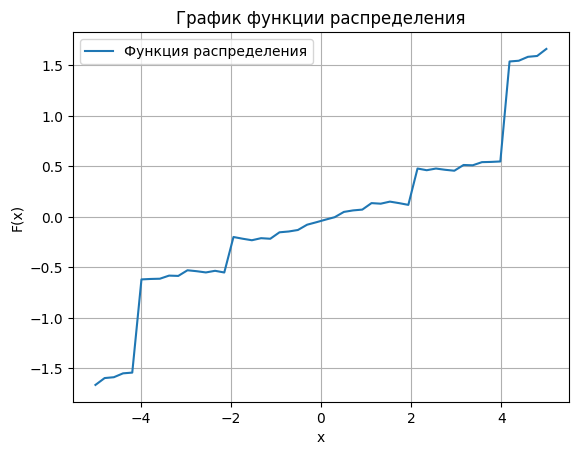

In [ ]:
unif = Unif(-1, 1)
chr_d = D(N, delta, chr, 10)
chr_d.make_plot(-5, 5, 50)

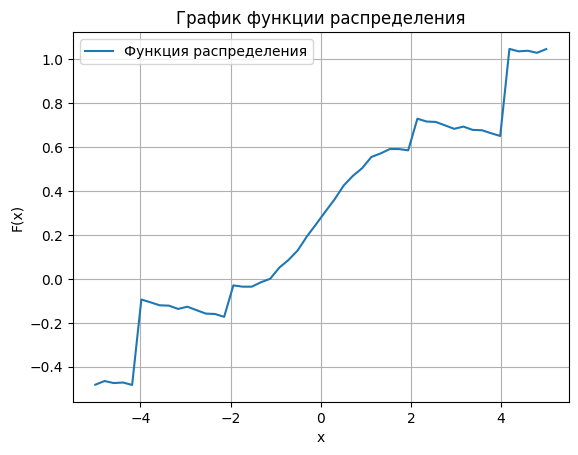

In [ ]:
chr_e = E(N, delta, chr, 10)
chr_e.make_plot(-5, 5, 50)

Провалидируем классы на рассчётах описанных в статье Бохмана.

In [13]:
from mpmath import mp

In [14]:
phi = lambda t : ((1 - 1j * t * sqrt(2)) ** (-0.5)) * exp((-1j * t) / sqrt(2))
N = 512
K = 4
d = 0.35 / 16
delta = (2 * pi) / (N * d)

In [15]:
F_exact = {
    -5.60 : 0,
    -4.55 : 0,
    -3.50 : 0,
    -2.45 : 0,
    -1.40 : 0,
    -1.05 : 0,
    -0.70 : 79586,
    -0.35 : 522700,
    0 : 682690,
    0.35 : 778553,
    0.70 : 841654,
    1.40 : 915695,
    1.75 : 937693,
    2.10 : 953678,
    3.15 : 980485,
    4.20 : 991570,
    5.25 : 996298
}
xs = F_exact.keys()

In [16]:
approxs = {
    'A' : A(N, delta, phi),
    'B' : B(N, delta, phi),
    'C' : C(N, delta, phi),
    'D' : D(N, delta, phi, K),
    'E' : E(N, delta, phi, K)
}

In [17]:
values = []
#print([F_exact[x] * 1e6 for x in xs])
for name in approxs:
  approx_func = approxs[name]
  values.append([(approx_func.cdf(x).real * 1e6 - F_exact[x]) for x in xs])

values = np.array(values)
values

array([[mpf('-2835.6557302544452'), mpf('-1269.5157399394418'),
        mpf('-574.60516745452469'), mpf('-260.97346261114222'),
        mpf('-106.93877761549368'), mpf('-56.835251529290289'),
        mpf('-4123.270735977494'), mpf('-117.33553835598286'),
        mpf('-80.103089482174255'), mpf('-61.057529963203706'),
        mpf('-50.572631704271771'), mpf('-35.741209859144874'),
        mpf('-32.067856270703487'), mpf('-27.953954378608614'),
        mpf('-21.113144348491915'), mpf('-17.787240787991323'),
        mpf('-14.791953039821237')],
       [mpf('-2822.0218915324617'), mpf('-1257.417101170957'),
        mpf('-564.68639699687571'), mpf('-255.15063682993318'),
        mpf('-115.76078106156453'), mpf('-88.472087398096747'),
        mpf('-8451.4769495937508'), mpf('-130.9534186712699'),
        mpf('-70.163900483748876'), mpf('-45.994061670964584'),
        mpf('-33.737768919207156'), mpf('-18.076166681130417'),
        mpf('-14.473948836908676'), mpf('-10.563881858834065'),
      

In [18]:
import pandas as pd

column_names = ["A", "B", "C", "D", "E"]
res = pd.DataFrame(values.transpose(), index=xs, columns=column_names)
res

,A,B,C,D,E
-5.60,-2835.65573025445,-2822.02189153246,-2835.64501266417,20.7863329402116,1.53567873429544
-4.55,-1269.51573993944,-1257.41710117096,-1269.51572528469,6.8485707907399,0.66531766505544
-3.50,-574.605167454525,-564.686396996876,-574.605167447802,-4.24582434746905,0.111001697344409
-2.45,-260.973462611142,-255.150636829933,-260.973462610991,-12.1003603206885,-2.77148666806533
-1.40,-106.938777615494,-115.760781061565,-106.938777615678,-8.58760448309413,-12.3400570009133
-1.05,-56.8352515292903,-88.4720873980967,-56.8352515286242,11.1278816840221,-13.6753212556794
-0.70,-4123.27073597749,-8451.47694959375,-4123.27073597835,-4079.48850378684,-8395.85705634723
-0.35,-117.335538355983,-130.95341867127,-117.335538355866,-92.9850795356324,-85.920671378728
0.00,-80.1030894821743,-70.1639004837489,-80.1030894821743,-71.5548568031518,-29.4466751643922
0.35,-61.0575299632037,-45.9940616709646,-61.057529963553,-65.5433969954029,-6.79181993019301
